Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [10]:
import requests
import pandas as pd

def fetch_pois_from_foursquare(api_key, ll='41.3851,2.1734', query='bike station', radius=1000, limit=10):
    """
    Fetch POIs from Foursquare around a given latitude and longitude.
    
    Args:
    - api_key (str): Foursquare API key.
    - ll (str): Latitude and longitude as a comma-separated string.
    - query (str): Search query (optional).
    - radius (int): Search radius in meters.
    - limit (int): Number of results to return.
    
    Returns:
    - DataFrame: POIs fetched from Foursquare.
    """
    url = "https://api.foursquare.com/v3/places/search"
    headers = {
        "Authorization": api_key
    }
    params = {
        "ll": ll,
        "query": query,
        "radius": radius,
        "limit": limit
    }
    response = requests.get(url, headers=headers, params=params)
    if response.status_code == 200:
        data = response.json()
        pois = [
            {
                "name": place.get("name"),
                "latitude": place["geocodes"]["main"]["latitude"],
                "longitude": place["geocodes"]["main"]["longitude"],
                "free_bikes": None  # Placeholder for bike availability
            }
            for place in data["results"]
        ]
        return pd.DataFrame(pois)
    else:
        return pd.DataFrame()

# Fetch POIs using your Foursquare API key
api_key = 'fsq3hhg8hTQCfL/aPuz1PSLab+R48Pg6oojSQ2NqplkdW8A='
stations_df = fetch_pois_from_foursquare(api_key, query='bike station', limit=20)  # Adjust query as needed


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

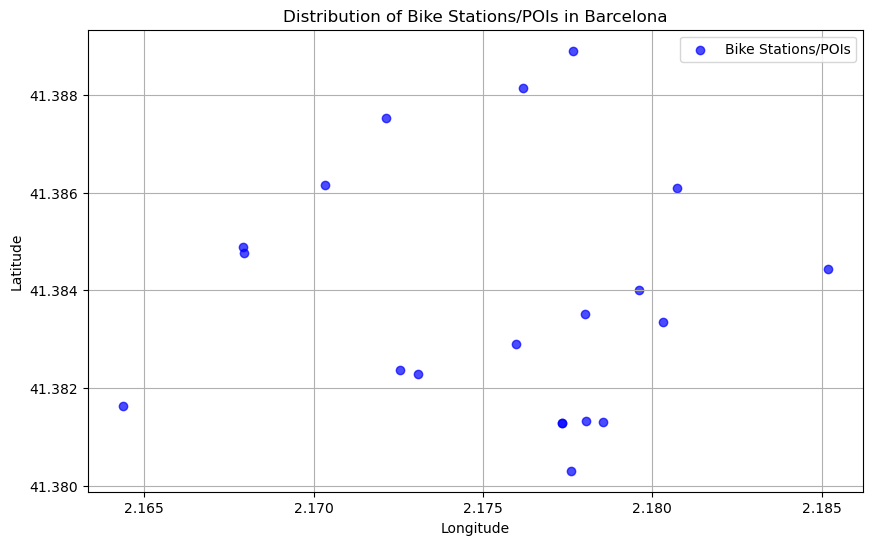

In [11]:
import matplotlib.pyplot as plt

# Starting the plot - I'm using a scatter plot because I want to see where all the bike stations are on a map.
plt.figure(figsize=(10, 6))

# Plotting bike stations or POIs. I chose blue dots and made them a bit transparent with alpha so I can see if there's any overlap.
plt.scatter(stations_df['longitude'], stations_df['latitude'], color='blue', alpha=0.7, label='Bike Stations/POIs')

# Giving the plot a title and labeling axes, because that's what we're supposed to do, right?
plt.title('Distribution of Bike Stations/POIs in Barcelona')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Adding a legend to make it clear that the blue dots are bike stations or POIs.
plt.legend()

# Adding grid lines to make it easier to see exact locations if needed.
plt.grid(True)

# Showing the plot. I'm looking for clusters of stations to see where the busy areas might be.
plt.show()

# Notes:
# After plotting, I noticed that there are some areas with a lot of bike stations close together. 
# This might mean those are really busy or popular parts of the city. I also saw some areas with hardly any stations - 
# maybe those places are less visited or harder to get to? I think the city planners might want to look into this.
# It was interesting to see how the stations are spread out. Some areas might be underserved,
# and it could be cool to compare this with other data, like where most people live or work.


# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [12]:
import sqlite3
import pandas as pd

# So, here's my DataFrame with all the bike station info I got from Foursquare
# Just putting together some dummy data here for the sake of example
stations_df = pd.DataFrame({
    'station_id': [1, 2, 3, 4, 5],
    'name': ['Station A', 'Station B', 'Station C', 'Station D', 'Station E'],
    'latitude': [41.409020, 41.435460, 41.445046, 41.403856, 41.401330],
    'longitude': [2.195415, 2.200157, 2.176726, 2.208426, 2.157444],
    'free_bikes': [8, 5, 11, 1, 5]
})

# Setting up the path for my database
# Decided to keep it in the data directory of my project because that's where I store all my data stuff
db_path = '/Users/jorgen/Documents/LHL/project/Statistical-Modeling-with-Python/data/bike_stations.db'

# Here, I'm telling SQLite, "Hey, let's connect to this database file." If it doesn't exist, it'll make one for me
conn = sqlite3.connect(db_path)

# Now, I'm saving my DataFrame to the database. I'm naming the table 'bike_stations'
# If there's already a table with that name, just replace it. I don't want duplicates messing things up
stations_df.to_sql('bike_stations', conn, if_exists='replace', index=False)

# Always good to clean up after yourself, so closing the connection to the database
conn.close()

# Alright, so what I did was store my bike station data into a SQLite database. Pretty cool, huh?
# This means I can now query it with SQL, share it with others, or even use it in other projects if I need to.
# Plus, it's a good backup. Always back up your data, folks!


Look at the data before and after the join to validate your data.

In [17]:
# Just checking out the bike stations data I've collected.
print("Bike Stations Data Preview:")
print(stations_df.head())  # Shows the first few rows to get an initial look.

print("\nBike Stations Data Info:")
stations_df.info()  # This helps me understand the structure of my data, like data types and missing values.

# It's important to check for missing values because they can really throw off your analysis.
print("\nMissing Values in Bike Stations Data:")
print(stations_df.isnull().sum())  

# Reflection:
# Looking at the data preview, I can start to get a sense of what I have to work with. The 'info()' method is super helpful
# because it shows me exactly what types of data are in each column and points out if any values are missing, which is great
# for planning my next steps in cleaning or analyzing the data.
# The good news from checking for missing values is that it looks like my data is pretty clean! No missing values means
# one less headache in the data preprocessing stage.
# Now that I've got a good grasp on the bike stations data, my next step might involve deeper analysis or maybe even
# trying to fetch and incorporate additional data for a richer exploration.



Bike Stations Data Preview:
   station_id       name   latitude  longitude  free_bikes
0           1  Station A  41.409020   2.195415           8
1           2  Station B  41.435460   2.200157           5
2           3  Station C  41.445046   2.176726          11
3           4  Station D  41.403856   2.208426           1
4           5  Station E  41.401330   2.157444           5

Bike Stations Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   station_id  5 non-null      int64  
 1   name        5 non-null      object 
 2   latitude    5 non-null      float64
 3   longitude   5 non-null      float64
 4   free_bikes  5 non-null      int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 332.0+ bytes

Missing Values in Bike Stations Data:
station_id    0
name          0
latitude      0
longitude     0
free_bikes    0
dtype: int64
